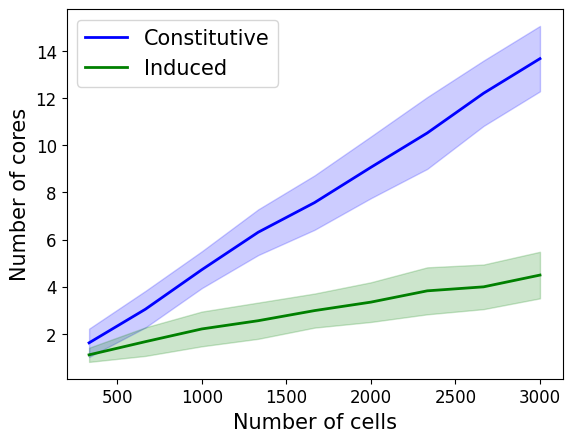

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add a parameter for scaling font size
font_scale = 1.5

# Read CSV data
df = pd.read_csv('simulation_outputs/simulation_log.csv')

# Separate dataframes for 'const' and 'ind'
B_cell_ratio = df['B_cell_ratio'][0]
const = df[df['k'] == 0]
ind = df[df['k'] != 0]

Y_VAL = 'final_cell_count'
X_VAL = 'total_cells'

# Calculating mean and standard deviation grouped by speed decay factor
const_grouped = const.groupby(X_VAL)[Y_VAL]
const_mean = const_grouped.mean()
const_std = const_grouped.std()
ind_grouped = ind.groupby(X_VAL)[Y_VAL]
ind_mean = ind_grouped.mean()
ind_std = ind_grouped.std()

# Plotting mean and standard deviation as line plots with shaded error bars
plt.plot(const_mean.index/B_cell_ratio, const_mean, color='blue', label='Constitutive', linewidth=2)
plt.fill_between(const_mean.index/B_cell_ratio, const_mean - const_std, const_mean + const_std, color='blue', alpha=0.2)
plt.plot(ind_mean.index/B_cell_ratio, ind_mean, color='green', label='Induced', linewidth=2)
plt.fill_between(ind_mean.index/B_cell_ratio, ind_mean - ind_std, ind_mean + ind_std, color='green', alpha=0.2)

# Adding the legend to the plot
plt.legend(fontsize=10 * font_scale)

# Adding axis labels and a title for better readability
plt.xlabel('Number of cells', fontsize=10 * font_scale)
plt.ylabel('Number of cores', fontsize=10 * font_scale)
plt.xticks(fontsize=8 * font_scale)
plt.yticks(fontsize=8 * font_scale)

# Show plot
plt.show()
